
# **Step 1: Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for seaborn
sns.set(style="whitegrid")


# **Step 2: Load Your Dataset**

In [9]:
# Load the datasets
train_df = pd.read_csv(r'C:\Users\anany\OneDrive\Documents\intership cybersecurity\NSL_KDD_Train.csv')
test_df = pd.read_csv(r'C:\Users\anany\OneDrive\Documents\intership cybersecurity\NSL_KDD_Test.csv')

# Define the column names for the NSL-KDD dataset
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

# Rename the columns
train_df.columns = column_names
test_df.columns = column_names


# **Step 3: Explore the Data**

In [10]:
# Display the first few rows of the datasets
print(train_df.head())
print(test_df.head())

# Display basic information about the datasets
print(train_df.info())
print(test_df.info())


   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   1   
1               0       0    0  ...                  26   
2               0       0    0  ...                 255   
3               0       0    0  ...                 255   
4               0       0    0  ...                  19   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.00                    0.60   
1                    0.10                    0.05   
2                    1.00                    0.00   
3     

# **Step 4: Check the Summary Statistics**

In [11]:
# Summary statistics of numerical features in the training dataset
print(train_df.describe())
print(test_df.describe())


            duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

# **Step 5: Check Data Types and Missing Values**

In [12]:
# Check for missing values in the training and test datasets
print(train_df.isnull().sum())
print(test_df.isnull().sum())


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# **Step 6: Visualize the Data**

**Univariate Analysis**
Histograms for Distribution

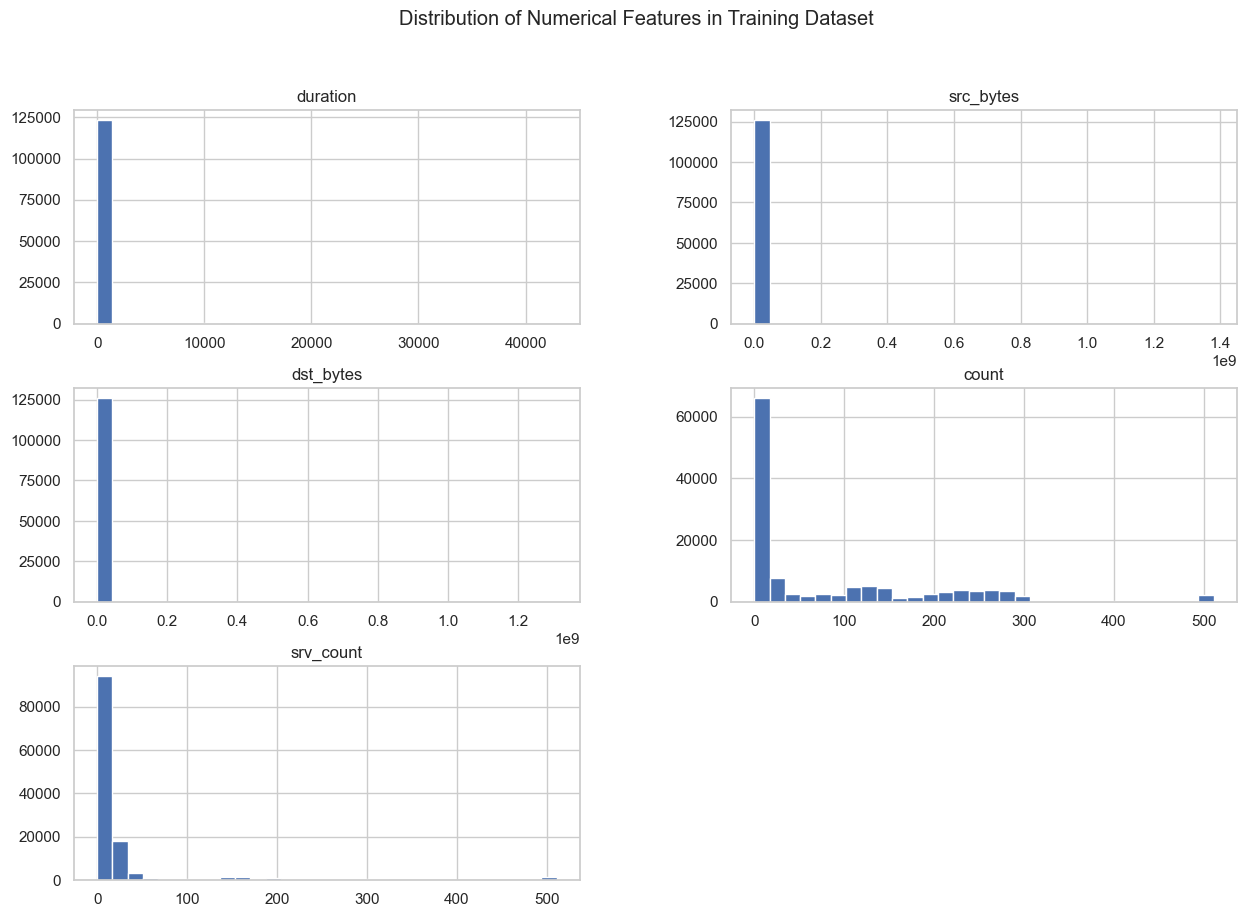

In [13]:
# Plot the distribution of a few numerical features in the training dataset
numeric_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
train_df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features in Training Dataset')
plt.show()


Box Plots for Outliers

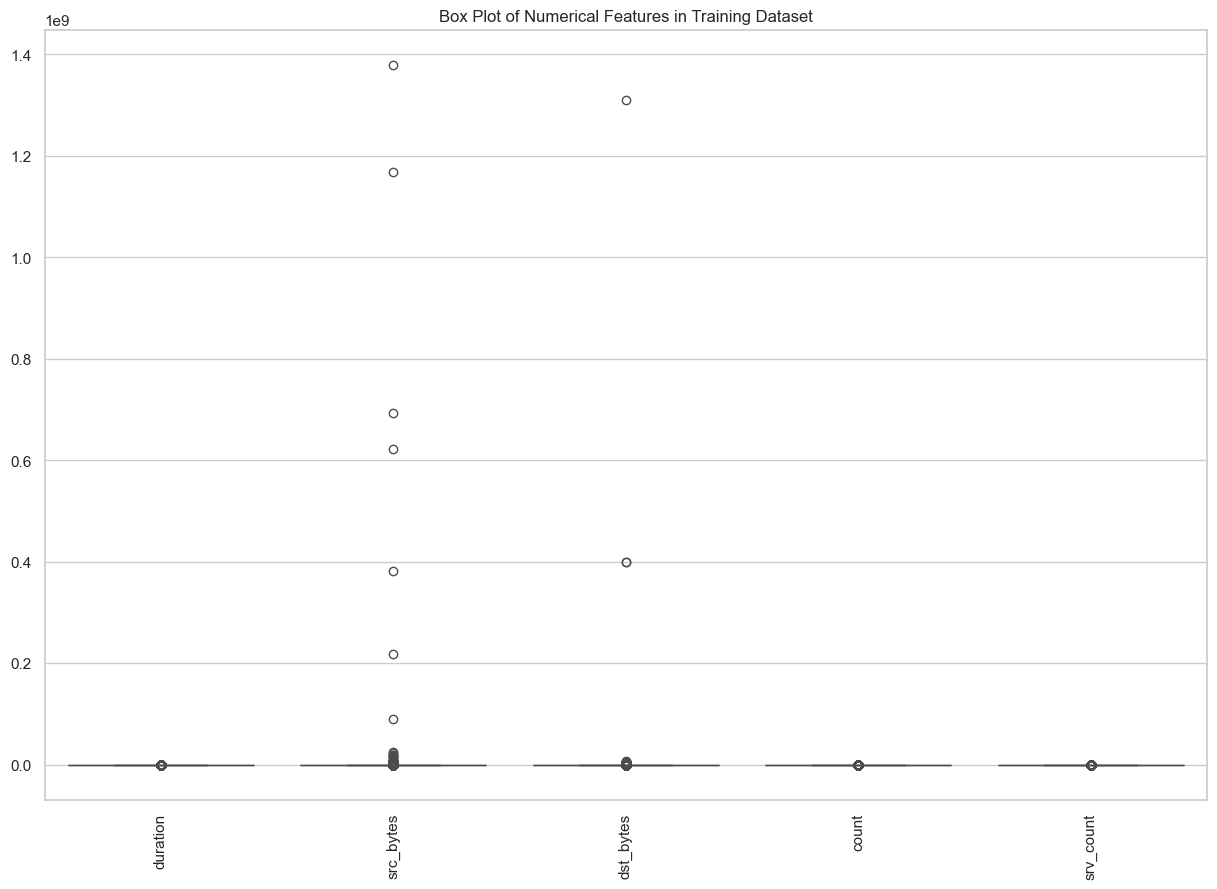

In [14]:
# Plot box plots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df[numeric_features])
plt.title('Box Plot of Numerical Features in Training Dataset')
plt.xticks(rotation=90)
plt.show()


**Bivariate Analysis**

Correlation Heatmap

In [15]:
# Identify non-numeric columns
non_numeric_cols = train_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')


In [16]:
# Drop non-numeric columns
numeric_df = train_df.select_dtypes(include=['number'])


In [17]:
# Convert categorical columns to numeric using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, drop_first=True)


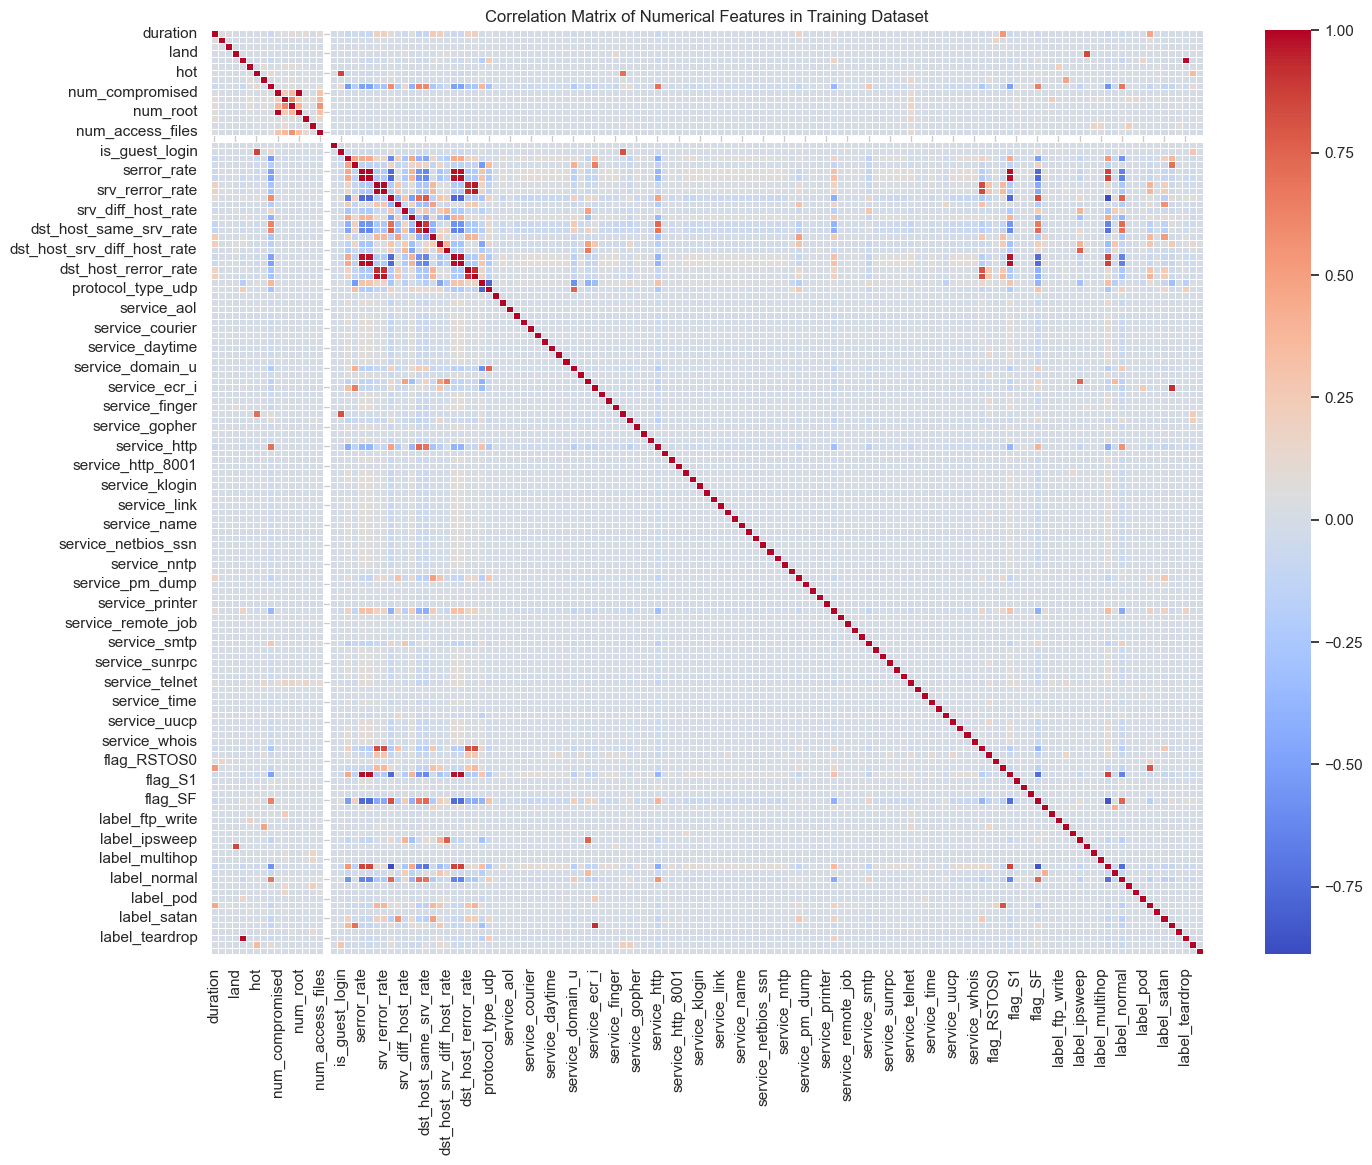

In [18]:
# Compute the correlation matrix for numerical features
correlation_matrix = train_df_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features in Training Dataset')
plt.show()


# **Step 7: Advanced Analysis**
Grouping and Aggregation

In [19]:
# Group by protocol_type and calculate mean of numerical features
grouped_data = train_df.groupby('protocol_type')[numeric_features].mean()
print(grouped_data)


                 duration     src_bytes     dst_bytes       count   srv_count
protocol_type                                                                
icmp             0.000000    342.577976      0.000000  121.881679  132.246412
tcp            281.389159  55861.281065  24253.782574   81.461222    9.443138
udp            485.372040     70.384913     70.830121   81.349163   95.249183


# **Step 8: Advanced Visualizations**
**Bar Plots, Violin Plots, etc.**

Bar Plot

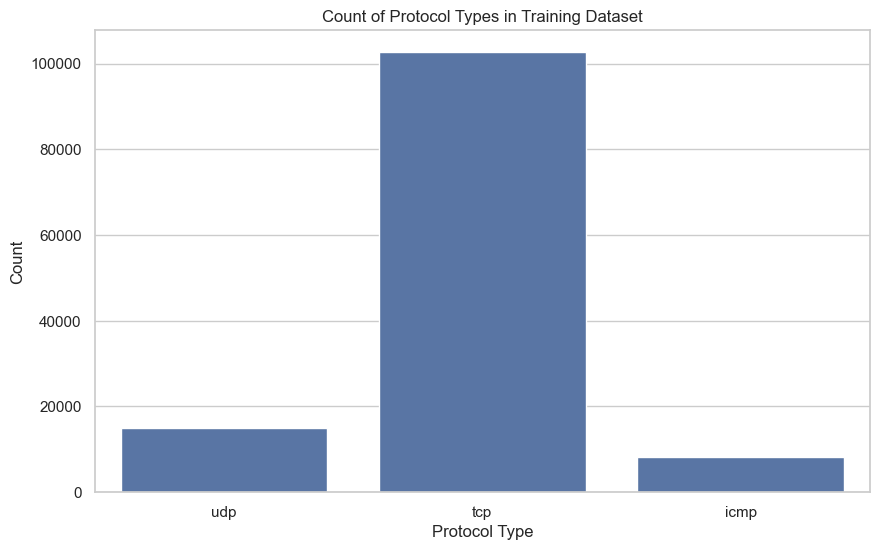

In [20]:
# Bar plot of protocol types in the training dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='protocol_type', data=train_df)
plt.title('Count of Protocol Types in Training Dataset')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()


Violin Plot

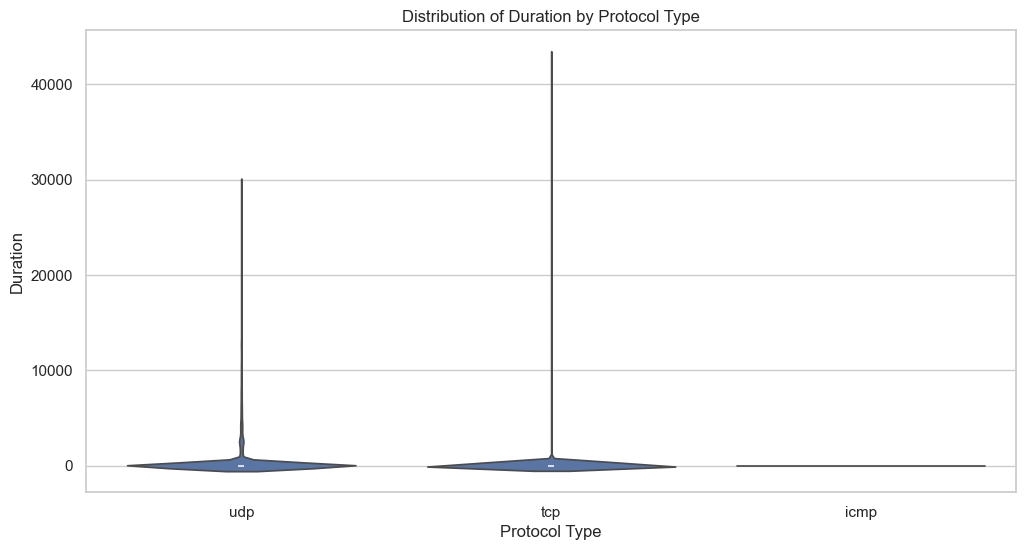

In [21]:
# Violin plot to show the distribution of duration by protocol type
plt.figure(figsize=(12, 6))
sns.violinplot(x='protocol_type', y='duration', data=train_df)
plt.title('Distribution of Duration by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Duration')
plt.show()


# **Step 9: Draw Insights**

#Patterns, Correlations, and Anomalies

High Correlation: The correlation heatmap reveals potential high correlations between certain features (e.g., 'srv_count' and 'dst_host_srv_count'). This suggests redundancy and a possible need for feature selection.

Outliers: The box plots highlight outliers in features like 'duration', 'src_bytes', and 'dst_bytes'. These outliers might represent anomalies or require further investigation.

Protocol Type Distribution:The bar plot shows the distribution of protocol types, indicating a dominance of TCP traffic.

Duration by Protocol Type: The violin plot suggests differences in duration distributions across protocol types, potentially indicating varying attack patterns.

# **Initial Hypotheses**

Feature Selection: Reducing the number of features based on correlation analysis might improve model performance.

Outlier Handling: Addressing outliers through techniques like winsorization or transformation could enhance model robustness.

Protocol-Specific Analysis: Investigating attack patterns specific to different protocol types might lead to more targeted detection strategies.

# **Step 10: Summarize Findings**

#Summary

The exploratory data analysis of the NSL-KDD dataset has provided valuable insights into the characteristics of network traffic and potential attack patterns. Key findings include:

#Potential redundancy among features due to high correlations.
* Presence of outliers in several numerical features.
* Dominance of TCP traffic and varying duration distributions across protocol types.

# These findings suggest the following directions for further analysis:

 * Feature selection to optimize model performance.
 * Outlier handling to improve model robustness.
 * Protocol-specific analysis to develop targeted detection strategies.